In [1]:
import tools
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
mus = np.array([[ 3.80070933, -3.79729494],
       [-3.06196045, -3.53454022],
       [-2.03436691,  4.172586  ],
       [ 3.97793064,  3.77333816]])
sigmas = [np.array([[ 0.92127818,  0.05738057],
        [ 0.05738057,  1.86586533]]), np.array([[ 6.24141047,  6.05017593],
        [ 6.05017593,  6.18245649]]), np.array([[ 2.90442399,  0.2065578 ],
        [ 0.2065578 ,  2.75617084]]), np.array([[  0.21035643,   0.29044911],
        [  0.29044911,  12.23993185]])]

In [3]:
K = 4
train = np.loadtxt('EMGaussian.data')
test = np.loadtxt('EMGaussian.test')
A = (1 / 6) * np.ones((K, K)) + (1 / 3) * np.identity(K)
Pi = 0.25 * np.ones(4)

log_alpha = tools.get_log_alpha(test, Pi, mus, sigmas, A)
log_beta = tools.get_log_beta(test, Pi, mus, sigmas, A)

In [4]:
tools.get_log_likelihood(log_alpha,log_beta)

-2424.1431138759531

In [5]:
smooth = tools.apply_smoothing(log_alpha, log_beta)

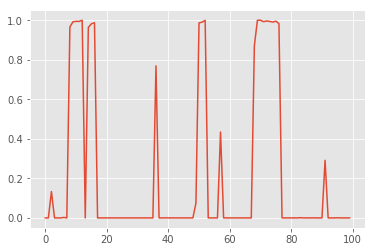

In [6]:
plt.plot(smooth[:100,0])
plt.show()

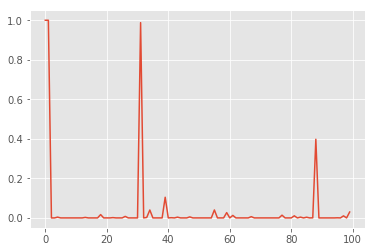

In [7]:
plt.plot(smooth[:100,1])
plt.show()

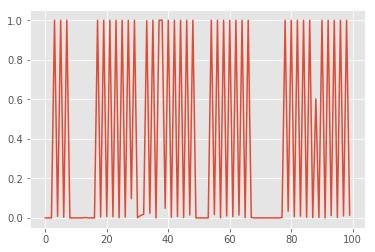

In [8]:
plt.plot(smooth[:100,2])
plt.show()

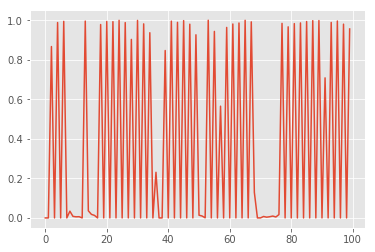

In [9]:
plt.plot(smooth[:100,3])
plt.show()

In [10]:
prob = tools.get_prob(log_alpha, log_beta, A, mus, sigmas, train)

In [11]:
Pi, A, mus, Sigmas, log_likelihood_train, log_likelihood_test = tools.EM(train, test, A, Pi, mus, sigmas, 0.0000001)

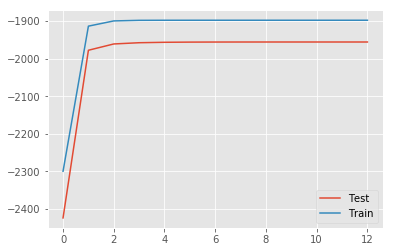

In [12]:
plt.plot(log_likelihood_test, label = "Test")
plt.plot(log_likelihood_train, label = "Train")
plt.legend()
plt.show()

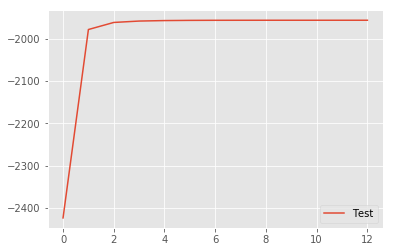

In [15]:
plt.plot(log_likelihood_test, label = "Test")
plt.legend()
plt.show()

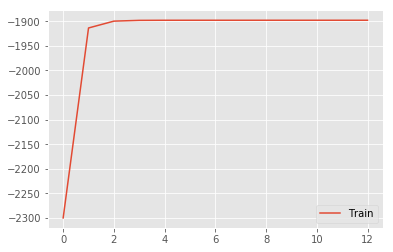

In [16]:
plt.plot(log_likelihood_train, label = "Train")
plt.legend()
plt.show()

In [13]:
log_likelihood_test[-1]

-1955.7135010636428

In [14]:
log_likelihood_train[-1]

-1897.7854776153599